In [82]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from voltagebudget import *
from fakespikes import util as fsutil

In [90]:
t = 0.3

k = 20
t_stim = 0.11
dt = 1e-4
w = 1e-4
a = 10000
ns, ts = util.k_spikes(t_stim, k, w, a=a, dt=dt, seed=None)
print(len(ts))

times = fsutil.create_times(t, dt)

20


In [132]:
N = 100
# w_in = 0.6e-9
# bias = 5e-3

f = 40 # 50
A = 1e-3
r_b = 0.0

ns_e, ts_e, vs = neurons.adex(t, N,
                             ns, ts, 
                             w_in=(0.3e-9, 0.3e-9), bias=(5e-3, 5e-3 / 5),
                             f=f, A=A,
                             r_b=r_b,
                             time_step=dt)

Starting simulation at t=0. s for a duration of 300. ms
300. ms (100%) simulated in < 1s
Starting simulation at t=0. s for a duration of 300. ms
300. ms (100%) simulated in < 1s


In [133]:
m = np.logical_or(t_stim <= ts_e, ts_e <= (t_stim + 20e-3))
y_sigma = np.std(ts_e[m])
print(y_sigma)

0.00157066920573


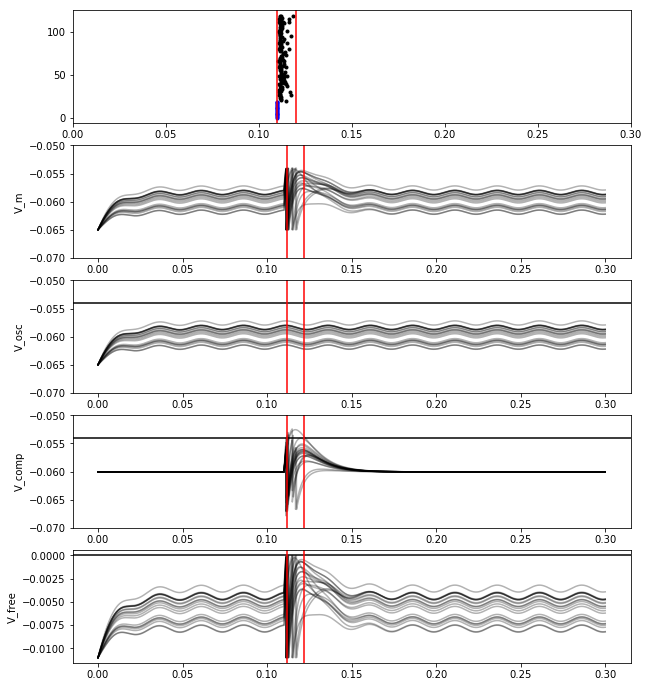

In [134]:
plt.figure(figsize=(10, 12))
plt.subplot(511)
plt.plot(ts, ns, '.b')
plt.plot(ts_e, ns_e + k, '.k')
plt.axvline(t_stim, color='red')
plt.axvline(t_stim + 10e-3, color='red')
plt.xlim(0, .3)

plt.subplot(512)
for j in range(20):
    plt.plot(times, vs['vm'][j, :], 'k', alpha=0.3);
plt.ylim(-70e-3, -50e-3)
plt.axvline(t_stim + 2e-3, color='red')
plt.axvline(t_stim + 12e-3, color='red')
plt.ylabel("V_m")

plt.subplot(513)
for j in range(20):
    plt.plot(times, vs['osc'][j, :], 'k', alpha=0.3);
plt.axhline(-54e-3, color='black')
plt.ylim(-70e-3, -50e-3)
plt.axvline(t_stim + 2e-3, color='red')
plt.axvline(t_stim + 12e-3, color='red')
plt.ylabel("V_osc")

plt.subplot(514)
for j in range(20):
    plt.plot(times, vs['comp'][j, :], 'k', alpha=0.3);
plt.axhline(-54e-3, color='black')
plt.ylim(-70e-3, -50e-3)
plt.axvline(t_stim + 2e-3, color='red')
plt.axvline(t_stim + 12e-3, color='red')
plt.ylabel("V_comp")

plt.subplot(515)
for j in range(20):
    plt.plot(times, vs['free'][j, :], 'k', alpha=0.3);
plt.axhline(0, color='black')
plt.ylabel("V_free")
plt.axvline(t_stim + 2e-3, color='red')
plt.axvline(t_stim + 12e-3, color='red')

In [135]:
# Now readout the 'E' response, in another LIF 

In [140]:
Nz = 100

f = 0
A = 0
r_b = 0.0

w_out = 3.0e-9 / N
ns_out, ts_out, vs_out = neurons.lif(t, Nz, 
                                     ns_e, ts_e,
                                     w_in=(w_out, w_out),
                                     bias=(5e-3, 5e-3 / 5),
                                     f=f, 
                                     A=A,
                                     r_b=r_b,
                                     refractory=t,
                                     time_step=dt)

Starting simulation at t=0. s for a duration of 300. ms
300. ms (100%) simulated in < 1s
Starting simulation at t=0. s for a duration of 300. ms
300. ms (100%) simulated in < 1s


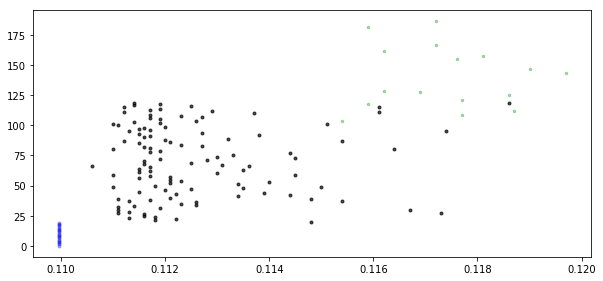

In [141]:
plt.figure(figsize=(10, 10))
plt.subplot(211)
plt.plot(ts, ns, '.b', alpha=0.3)
plt.plot(ts_e, ns_e + k, '.k', alpha=0.7)
plt.plot(ts_out, ns_out + N + 1, '.g', alpha=0.3, markersize=5)
# plt.xlim(0.09, .15)